In [1]:
host = 'SYNPAI' #'habanero'
if host == 'habanero':
    resultdir ='/rigel/issa/users/Tahereh/Results/'
    neuraldir = '/rigel/issa/users/Tahereh/models/neural_features/'
    modeldir = '/rigel/issa/users/Tahereh/models/'
    datadir = '/rigel/issa/users/Tahereh/Data/DiCarlo/'
elif host =='Mac':
    resultdir ='/Users/tahereh/Documents/Results/invertibility/error coding in visual cortex/'
    neuraldir = '/Users/tahereh/Documents/Results/invertibility/error coding in visual cortex/models/neural_features/'
    modeldir ='/Users/tahereh/Documents/Results/invertibility/error coding in visual cortex/models/'
    datadir = '/Users/Tahereh/Documents/Data/DiCarlo'
elif host == 'SYNPAI':
    resultdir = '/home/tahereh/Documents/Research/Results/Neural-Dynamics/'
    neuralfeaturesdir = '/home/tahereh/Documents/Research/features/neural_features/'
    modeldir =  '/home/tahereh/Documents/Research/features/'
    datadir =  '/home/tahereh/Documents/Research/Data/DiCarlo/'
    # %pylab inline
    # pylab.rcParams['xtick.color'] = 'white'
    # pylab.rcParams['ytick.color'] = 'white'
    # # pylab.rcParams['figsize'] = [6,4]
    

In [10]:
import MappingV36
from MappingV36 import MappingV36 as Mapping
from ReadMeta import ReadMeta
from ReadData import ReadData
from ReadModel import ReadModel

import pickle
import h5py
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

import importlib
Mapping = Mapping()



In [3]:

# Read Meta
Meta = ReadMeta(neuralfeaturesdir)
DF_img = Meta.get_DF_img()
DF_neu = Meta.get_DF_neu()
times = Meta.get_times()

# Read Neural data
Data = ReadData(datadir, DF_neu)
IT, V4 = Data.get_data()

/home/tahereh/Documents/Research/features/neural_features/


In [4]:

# get_consistencies
region = 'IT'
time_interval_fixed = [70, 130]
flexible_times = np.arange(70, 280, 10)
itr = 0    
pseed = itr

trial_split = Mapping.trial_split
inds1, inds2 = trial_split(pseed)
mean_trial_split = Mapping.mean_trial_split
get_Neu_trial_V36 = Mapping.get_Neu_trial_V36
half1, half2 = mean_trial_split(inds1, inds2, get_Neu_trial_V36(IT[1:], time_interval_fixed, times))
train_test_split_objV36 = Mapping.train_test_split_objV36
test_size = 0.2
train_inds, test_inds = train_test_split_objV36(DF_img, test_size)


In [7]:
Neu_trial = IT[1:]
reg_method = 'ridge'  # 'PLS'#'ridge'

if reg_method == 'PLS':
    n_components = 25
    reg_params = n_components
elif reg_method == 'ridge':
    reg_params = [20, -10, 10]
    n_components = 500


n_components_PCA = 500
folder_name = 'HvM_forward_features/'
# Model 1
# Read Model
model_layer1 = 'conv5'
Model = ReadModel(model_layer1, modeldir, True, n_components_PCA)
model1 = Model.get_model()[640:,:]


filename = modeldir+'%s/500PCA/%dcmps_%s.h5'%(folder_name, n_components_PCA, model_layer1)
h5f = h5py.File(filename, 'w')
h5f.create_dataset('model_layer', data=model1)
h5f.close()

# # Model 2
# # Read Model
# model_layer2 = 'resnet_layer4'
# Model = ReadModel(model_layer2, modeldir, True, n_components_PCA)
# model2 = Model.get_model()[640:,:]
# 
# 
# filename = modeldir+'%s/500PCA/%dcmps_%s.h5'%(folder_name, n_components_PCA, model_layer2)
# h5f = h5py.File(filename, 'w')
# h5f.create_dataset('model_layer', data=model2)
# h5f.close()


In [11]:
   

importlib.reload(MappingV36)
from MappingV36 import MappingV36 as Mapping
Mapping = Mapping()
get_consistency = Mapping.get_consistency
r_sites_fixed_1, r_sites_flexible_1, list_acceptable_neurons_1 = get_consistency(reg_method, reg_params,  model1,inds1, inds2,  Neu_trial, train_inds, test_inds, time_interval_fixed, flexible_times, times)


datalist = [r_sites_fixed_1, r_sites_flexible_1, list_acceptable_neurons_1, flexible_times, time_interval_fixed, reg_method, reg_params]
filename = resultdir+'model%s_IT_fixedflexible.pickle'%model_layer1
pickle.dump(datalist, open(filename, 'wb'))
print('Model1 done')

# r_sites_fixed_2, r_sites_flexible_2, list_acceptable_neurons_2 = get_consistency(reg_method, reg_params, model2, inds1, inds2,  Neu_trial, train_inds, test_inds, time_interval_fixed, flexible_times, times)
# print('Model2 done')
# 
# 
# datalist = [r_sites_fixed_2, r_sites_flexible_2, list_acceptable_neurons_2, flexible_times, time_interval_fixed, reg_method, reg_params]
# filename = resultdir+'model%s_IT_fixedflexible.pickle'%model_layer2
# pickle.dump(datalist, open(filename, 'wb'))

1.0211430152257284 minutes
1.0211515188217164 minutes
70 1.0211519877115884 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


80 2.0853573441505433 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


90 3.195521092414856 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


100 4.266790707906087 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


110 5.3783872882525126 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


120 6.490895454088847 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


130 7.589717388153076 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


140 8.497615993022919 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


150 9.4089368780454 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


160 10.306968744595846 minutes


170 11.215096632639566 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


180 12.157263211409251 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


190 13.059666923681895 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


200 13.980396795272828 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


210 14.905258425076802 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


220 15.79467693567276 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


230 16.686654925346375 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


240 17.574154114723207 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


250 18.510852122306822 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


260 19.379693873723348 minutes


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


270 20.24902016321818 minutes


Model1 done


/home/tahereh/Codes/Github/Mapping/MappingV36.py:165: RuntimeWarning: invalid value encountered in sqrt
  return numerator/(np.sqrt(LHS*RHS))


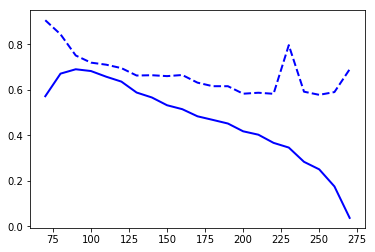

In [13]:



import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(flexible_times, np.mean(r_sites_fixed_1[3,list_acceptable_neurons_1,:],0), lw=2, ls='-', color='b')
plt.plot(flexible_times, np.mean(r_sites_flexible_1[3,list_acceptable_neurons_1,:], 0), lw=2, ls='--', color = 'b')



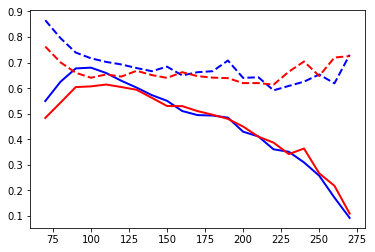

In [22]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(flexible_times, np.mean(r_sites_fixed_1[3,list_acceptable_neurons_1,:],0), lw=2, ls='-', color='b')
plt.plot(flexible_times, np.mean(r_sites_flexible_1[3,list_acceptable_neurons_1,:], 0), lw=2, ls='--', color = 'b')

plt.plot(flexible_times, np.mean(r_sites_fixed_2[3,list_acceptable_neurons_2,:],0), lw=2, ls='-', color = 'r')
plt.plot(flexible_times, np.mean(r_sites_flexible_2[3,list_acceptable_neurons_2,:], 0), lw=2, ls='--', color = 'r')

In [7]:
r2XAB = (r2AX +r2BX -2*np.sqrt(r2AX)*np.sqrt(r2BX)*rAB)/(1-np.square(rAB))